In [152]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB

In [156]:
df=pd.read_csv("oral_and _oropharyngeal_cancer_dataset.csv")
print(df.shape)
data=np.array(df)
#print(data)
x=data[:,:-1]
y=data[:,-1]
print(data.shape,x.shape,y.shape)


(1398, 16)
(1398, 16) (1398, 15) (1398,)


In [157]:
epsilon=0.0000001
for i in range(x.shape[1]):
    min_=min(x[:,i])
    max_=max(x[:,i])
    x[:,i]=(x[:,i]-min_)/(max_-min_+epsilon)
    x[:,i]=(x[:,i]-np.mean(x[:,i]))/(np.std(x[:,i]+epsilon))

In [158]:
print(any(np.mean(x,axis=0)>0.00001))
print(any(np.std(x,axis=0)>1))
#print(np.mean(x,axis=0))
#print(np.std(x,axis=0))

False
False


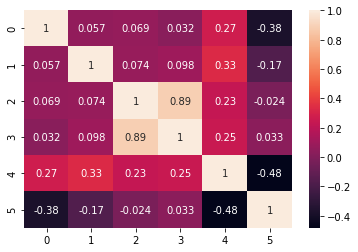

In [159]:
heatmap_df=pd.DataFrame(x[:,:6])
cm=np.corrcoef(heatmap_df.values.T)
sns.heatmap(cm,annot=True)
plt.show()

In [193]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.20)
print(xtrain.shape,ytrain.shape,xtest.shape,ytest.shape)

(1118, 15) (1118,) (280, 15) (280,)


In [194]:
'''print(ytrain)
for i in range(xtrain.shape[1]):
    print(x[:,i].dtype)
    if any(xtrain[:,i]==np.nan):
        print("true")
    if any(xtrain[:,i]==np.inf):
        print("true")'''

'print(ytrain)\nfor i in range(xtrain.shape[1]):\n    print(x[:,i].dtype)\n    if any(xtrain[:,i]==np.nan):\n        print("true")\n    if any(xtrain[:,i]==np.inf):\n        print("true")'

In [228]:
lr=LogisticRegression(penalty='l2',solver='lbfgs')
lr.fit(xtrain,ytrain)
pred=lr.predict(xtest)
lr_acc=accuracy_score(pred,ytest)
print("Accuracy Score : %.2f"%lr_acc)
print("\nConfusion Matrix \n",confusion_matrix(pred,ytest))
print("\nclassification report \n",classification_report(pred,ytest))

Accuracy Score : 0.81

Confusion Matrix 
 [[218  44]
 [  8  10]]

classification report 
               precision    recall  f1-score   support

         0.0       0.96      0.83      0.89       262
         1.0       0.19      0.56      0.28        18

    accuracy                           0.81       280
   macro avg       0.57      0.69      0.59       280
weighted avg       0.91      0.81      0.85       280



In [229]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(xtrain, ytrain)
pred = classifier.predict(xtest)
knn_acc=accuracy_score(pred,ytest)
print("Accuracy Score : %.2f"%knn_acc)
print("\nConfusion Matrix \n",confusion_matrix(pred,ytest))
print("\nclassification report \n",classification_report(pred,ytest))

Accuracy Score : 0.94

Confusion Matrix 
 [[218  10]
 [  8  44]]

classification report 
               precision    recall  f1-score   support

         0.0       0.96      0.96      0.96       228
         1.0       0.81      0.85      0.83        52

    accuracy                           0.94       280
   macro avg       0.89      0.90      0.90       280
weighted avg       0.94      0.94      0.94       280



In [231]:
classifier = GaussianNB()
classifier.fit(xtrain,ytrain)
ypred=classifier.predict(xtest)
gnb_acc=accuracy_score(ypred,ytest)
print("Accuracy Score : %.2f"%gnb_acc)
print("\nConfusion Matrix \n",confusion_matrix(ypred,ytest))
print("\nclassification report \n",classification_report(ypred,ytest))

Accuracy Score : 0.23

Confusion Matrix 
 [[ 12   1]
 [214  53]]

classification report 
               precision    recall  f1-score   support

         0.0       0.05      0.92      0.10        13
         1.0       0.98      0.20      0.33       267

    accuracy                           0.23       280
   macro avg       0.52      0.56      0.22       280
weighted avg       0.94      0.23      0.32       280



In [221]:
from keras.models import Sequential
from keras.layers import Dense , BatchNormalization , Dropout
import keras.backend as k
import tensorflow as tf
from keras import losses, optimizers, regularizers
from keras.utils import to_categorical

In [205]:
y_train=to_categorical(ytrain)

In [255]:
model = Sequential()
model.add(Dense(64,activation='relu',kernel_regularizer='l2'))
model.add(BatchNormalization())
model.add(Dense(32,activation='relu',kernel_regularizer='l2'))
model.add(BatchNormalization())
model.add(Dense(16,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(2,activation= "softmax"))
model.compile(loss='categorical_crossentropy' , optimizer = "adam" , metrics = ["accuracy"])
history = model.fit(xtrain,y_train , epochs =70 , batch_size=32)

Epoch 1/70
1118/1118 [==============================] - 5s 4ms/step - loss: 1.3715 - acc: 0.5778
Epoch 2/70
1118/1118 [==============================] - 0s 173us/step - loss: 1.1917 - acc: 0.7182
Epoch 3/70
1118/1118 [==============================] - 0s 169us/step - loss: 1.0742 - acc: 0.7961
Epoch 4/70
1118/1118 [==============================] - 0s 172us/step - loss: 0.9832 - acc: 0.8265
Epoch 5/70
1118/1118 [==============================] - 0s 164us/step - loss: 0.9143 - acc: 0.8462
Epoch 6/70
1118/1118 [==============================] - 0s 170us/step - loss: 0.8419 - acc: 0.8703
Epoch 7/70
1118/1118 [==============================] - 0s 167us/step - loss: 0.7792 - acc: 0.8757
Epoch 8/70
1118/1118 [==============================] - 0s 172us/step - loss: 0.7353 - acc: 0.8864
Epoch 9/70
1118/1118 [==============================] - 0s 164us/step - loss: 0.6846 - acc: 0.9016
Epoch 10/70
1118/1118 [==============================] - 0s 177us/step - loss: 0.6434 - acc: 0.9061
Epoch 11/70

0.95


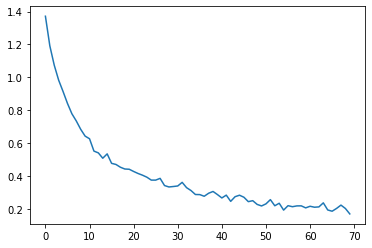

In [256]:
ypred=np.argmax(model.predict(xtest) , axis =1)
mlp_acc=accuracy_score(ypred,ytest)
print("%.2f"%mlp_acc)
plt.plot(history.history['loss'])


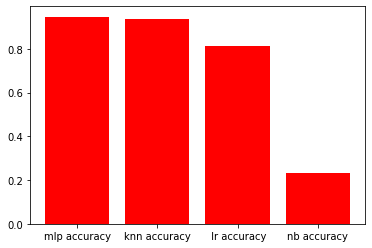

In [257]:
y_axis=[mlp_acc,knn_acc,lr_acc,gnb_acc]
x_axis=np.arange(len(y_axis))+1
x_lables=["mlp accuracy","knn accuracy", " lr accuracy" , "nb accuracy"]
plt.bar(x_axis,y_axis,align="center",color="red")
plt.xticks(x_axis,x_lables)
plt.show()